In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from datetime import datetime
from IPython.display import display

In [2]:
#Preparing the dataset
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

df_trustpilot = pd.read_csv('data/data_trustpilot_clean.csv', engine='python')


In [3]:
display(df_trustpilot.head())

,username,number_reviews,location,rating,text,date_posted,date_of_experience,verification,subject,answer,page_number,company
0,SStreetly,4 reviews,GB,1,Asda at fosse park leicester is old yes. Thoug...,2024-11-22 09:22:38,"November 20, 2024",NaN,Asda at fosse park leicester is old…,NaN,1,Asda
1,Ciaran,1 review,GB,1,Ordered flowers this morning and paid extra fo...,2024-11-22 12:21:22,"November 22, 2024",NaN,Ordered flowers this morning and paid…,NaN,1,Asda
2,Rosie Brocklehurst,63 reviews,GB,1,Why is Asda taking money for a grocery deliver...,2024-11-22 14:14:39,"November 22, 2024",NaN,Why is Asda taking money for a grocery…,NaN,1,Asda
3,Heidi Warfield,1 review,GB,1,I’m absolutely disgusted that a company like A...,2024-11-22 09:30:19,"November 19, 2024",NaN,I’m absolutely disgusted robbed by Asda that a...,NaN,1,Asda
4,Noetic Aphrodite,3 reviews,GB,1,"For those who haven't seen my previous review,...",2024-11-19 22:58:03,"November 19, 2024",NaN,For those who haven't seen my previous…,NaN,1,Asda


STAGE 1 - DATASET INSPECTIONS

In [4]:
#Inspecting the full dataset

print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'page_number', 'company'],
      dtype='object')
The dataset has  12 columns
The dataset has  425322 rows


In [5]:
#Deleting the page_number column as it is no longer needed or relevant
df_trustpilot.drop(columns=['page_number'], inplace=True)

#Verifying the output
print("These are the names of the columns present: ", "\n", df_trustpilot.columns)
print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")

These are the names of the columns present:  
 Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')
The dataset has  11 columns
The dataset has  425322 rows


In [6]:
print("Printing the relevant information from the file such as type per variable: ", "n")
print(df_trustpilot.info())

Printing the relevant information from the file such as type per variable:  n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425322 entries, 0 to 425321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   username            425174 non-null  object
 1   number_reviews      425322 non-null  object
 2   location            425296 non-null  object
 3   rating              425322 non-null  int64 
 4   text                425322 non-null  object
 5   date_posted         425322 non-null  object
 6   date_of_experience  425322 non-null  object
 7   verification        348623 non-null  object
 8   subject             425216 non-null  object
 9   answer              215257 non-null  object
 10  company             425322 non-null  object
dtypes: int64(1), object(10)
memory usage: 35.7+ MB
None


In [7]:
#Converting rating to integer
print(df_trustpilot['rating'].unique())
df_trustpilot['rating'] = df_trustpilot['rating'].astype('int')

[1 5 4 2 3]


In [8]:
#Amending the dataset
#number_reviews: Removing 'review(s)' from cell and converting to an integer
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)reviews', '', regex=True).str.strip()
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].str.replace('(?i)review', '', regex=True).str.strip()
print(df_trustpilot['number_reviews'].value_counts())
df_trustpilot['number_reviews'] = df_trustpilot['number_reviews'].astype(int)

#Verifying output
print(df_trustpilot.info())
print(df_trustpilot.head())

number_reviews
1      276509
2       69239
3       28249
4       14419
5        8495
6        5708
7        3852
8        2757
9        2115
10       1714
11       1443
12       1180
13        956
14        820
15        715
16        601
17        506
18        438
19        413
21        374
20        339
22        310
23        303
24        247
25        231
26        217
27        183
28        178
31        152
29        147
32        132
30        131
33        123
35        112
34        109
36        103
41         96
38         93
39         91
37         81
40         64
44         61
42         58
46         53
45         52
43         49
47         48
48         47
49         47
50         46
56         40
52         40
53         39
57         38
55         38
51         33
60         28
58         27
69         26
54         25
59         25
63         23
66         22
62         22
61         21
68         19
67         19
64         16
65         16
73         15
89   

In [9]:
#date_of_experience: Converting to datetime format
df_trustpilot['date_of_experience'] = pd.to_datetime(df_trustpilot['date_of_experience'], errors='coerce')

#date_posted: convert to datetime format
df_trustpilot['date_posted'] = pd.to_datetime(df_trustpilot['date_posted'])

print(df_trustpilot.info())
print(df_trustpilot.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425322 entries, 0 to 425321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            425174 non-null  object        
 1   number_reviews      425322 non-null  int64         
 2   location            425296 non-null  object        
 3   rating              425322 non-null  int64         
 4   text                425322 non-null  object        
 5   date_posted         425322 non-null  datetime64[ns]
 6   date_of_experience  425322 non-null  datetime64[ns]
 7   verification        348623 non-null  object        
 8   subject             425216 non-null  object        
 9   answer              215257 non-null  object        
 10  company             425322 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 35.7+ MB
None
             username  number_reviews location  rating  \
0           SSt

STAGE 2 - DUPLICATES AND MISSING VALUES

In [10]:
#Identifying and handling duplicates in the dataset
print("Duplicate rows before:")
print(df_trustpilot.duplicated().sum())
df_trustpilot = df_trustpilot.drop_duplicates()
print("Duplicate rows after:")
print(df_trustpilot.duplicated().sum())

Duplicate rows before:
81
Duplicate rows after:
0


In [11]:
#Identifying missing values in the dataset
print("Missing values:")
print(df_trustpilot.isnull().sum())

Missing values:
username                 148
number_reviews             0
location                  26
rating                     0
text                       0
date_posted                0
date_of_experience         0
verification           76689
subject                  106
answer                210031
company                    0
dtype: int64


In [12]:
#Handling missing values

#Username missing value
print("This is the distribution of the types of username in the dataset: ", "\n", df_trustpilot['username'].value_counts().head())

#The username with the highest number in the dataset is 'Customer'. As this is a non-descript name for a username, we will apply it to the missing username.
df_trustpilot['username'] = df_trustpilot['username'].fillna('Customer')

#Verification missing value
print("This is the distribution of the types of verifications in the dataset: ", "\n", df_trustpilot['verification'].value_counts().head())

#Inspection indicates that there is no value under verification specifically indicating that a user is not verified. We will hence create a new variable named 'Not Verified' and fill the n/a values with it. 
df_trustpilot['verification'] = df_trustpilot['verification'].fillna('Not Verified')

#Subject and location with missing values will be dropped due to the low number
df_trustpilot = df_trustpilot.dropna(axis=0, how='any', subset=['location', 'subject'])

# Answer has a large number of empty values, which is to be expected.
# We will fill those values with 0
df_trustpilot['answer'] = df_trustpilot['answer'].fillna(0)

df_trustpilot.dropna(inplace=True)

print("Missing values:")
print(df_trustpilot.isnull().sum())

print("The dataset has ", df_trustpilot.shape[1], "columns")
print("The dataset has ", df_trustpilot.shape[0], "rows")


This is the distribution of the types of username in the dataset:  
 username
customer      2911
Guest User    1166
John          1154
David          998
Michael        902
Name: count, dtype: int64
This is the distribution of the types of verifications in the dataset:  
 verification
Verified      252833
Invited        95614
Redirected       104
Merged             1
Name: count, dtype: int64
Missing values:
username              0
number_reviews        0
location              0
rating                0
text                  0
date_posted           0
date_of_experience    0
verification          0
subject               0
answer                0
company               0
dtype: int64
The dataset has  11 columns
The dataset has  425109 rows


In [13]:
print("Checking dtypes are correct:")
print(df_trustpilot.info())

print("Verifying there are no more missing values:")
print(df_trustpilot.isnull().sum().sum())

print("Verifying there are no more duplicates:")
print(df_trustpilot.duplicated().sum())


Checking dtypes are correct:
<class 'pandas.core.frame.DataFrame'>
Index: 425109 entries, 0 to 425321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            425109 non-null  object        
 1   number_reviews      425109 non-null  int64         
 2   location            425109 non-null  object        
 3   rating              425109 non-null  int64         
 4   text                425109 non-null  object        
 5   date_posted         425109 non-null  datetime64[ns]
 6   date_of_experience  425109 non-null  datetime64[ns]
 7   verification        425109 non-null  object        
 8   subject             425109 non-null  object        
 9   answer              425109 non-null  object        
 10  company             425109 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 38.9+ MB
None
Verifying there are no more missing values:
0
Ver

In [14]:
#Fix content standardization
print(df_trustpilot.columns)

#username
display(df_trustpilot['username'].value_counts().head(10))
#Standardizing 'customer' and 'Customer'
df_trustpilot['username'] = df_trustpilot['username'].str.title()

#There are additional entries that are not of value to us in this column. 'Quicken Member' and 'Anonymous' should also be converted to 'Customer' as all of these entries are people who did not provide their real name.
replacements = {'Quicken Member': 'Customer','Anonymous': 'Customer', 'Anounymous': 'Customer'}
df_trustpilot['username'] = df_trustpilot['username'].replace(replacements)
display(df_trustpilot['username'].value_counts().head(10))

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')


username
customer      2911
Guest User    1166
John          1154
David          998
Customer       908
Michael        902
Robert         870
James          841
Anonymous      661
Richard        582
Name: count, dtype: int64

username
Customer      4768
John          1367
Guest User    1168
David         1125
Michael       1028
Robert        1018
James          990
Richard        659
William        615
Chris          578
Name: count, dtype: int64

STAGE 3 - TARGET VARIABLE INSPECTION

In [15]:
#Inspecting statistical distributions of target variable 'rating'
print("These are the statistical distributions of the target variable present in the dataset: ", "\n")
print(df_trustpilot['rating'].describe())

#Calculating mode, mean and median for each numeric variable
mode_value = df_trustpilot['rating'].mode()[0]
mode_count = df_trustpilot['rating'].value_counts().iloc[0]
median_value = df_trustpilot['rating'].median()
    
print(f"The most common rating is {mode_value}, appearing {mode_count} times")
print(f"The median rating is: {median_value:.2f}")

These are the statistical distributions of the target variable present in the dataset:  

count    425109.000000
mean          3.836385
std           1.551800
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64
The most common rating is 5, appearing 236305 times
The median rating is: 5.00


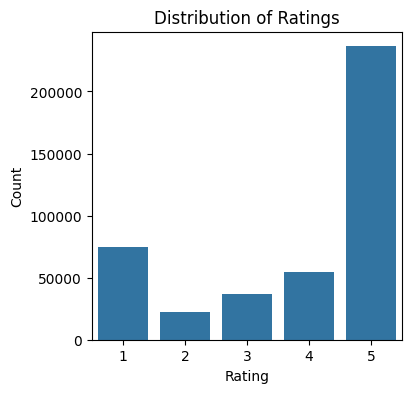

In [16]:
#Shows the distribution of rating
plt.figure(figsize=(4, 4))
sns.countplot(data=df_trustpilot, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Distribution shows a class imbalance

In [17]:
#Rating imbalance analysis
total = len(df_trustpilot)
rating_counts = df_trustpilot['rating'].value_counts().sort_index()
print("\nDetailed class distribution:")
for rating, count in rating_counts.items():
    percentage = (count/total) * 100
    ratio_to_max = count/rating_counts.max()
    print(f"Rating {rating}:")
    print(f"  Count: {count}")
    print(f"  Percentage: {percentage:.2f}%")
    print(f"  Ratio to largest class: 1:{1/ratio_to_max:.2f}")


Detailed class distribution:
Rating 1:
  Count: 74756
  Percentage: 17.59%
  Ratio to largest class: 1:3.16
Rating 2:
  Count: 22188
  Percentage: 5.22%
  Ratio to largest class: 1:10.65
Rating 3:
  Count: 37215
  Percentage: 8.75%
  Ratio to largest class: 1:6.35
Rating 4:
  Count: 54645
  Percentage: 12.85%
  Ratio to largest class: 1:4.32
Rating 5:
  Count: 236305
  Percentage: 55.59%
  Ratio to largest class: 1:1.00


In [18]:
#Inspecting final output 

print(df_trustpilot.columns)
print(df_trustpilot.info())
print("The Trustpilot dataset has ", df_trustpilot.shape[1], "columns")
print("The Trustpilot dataset has ", df_trustpilot.shape[0], "rows")
display(df_trustpilot.head())

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_posted', 'date_of_experience', 'verification', 'subject',
       'answer', 'company'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 425109 entries, 0 to 425321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   username            425109 non-null  object        
 1   number_reviews      425109 non-null  int64         
 2   location            425109 non-null  object        
 3   rating              425109 non-null  int64         
 4   text                425109 non-null  object        
 5   date_posted         425109 non-null  datetime64[ns]
 6   date_of_experience  425109 non-null  datetime64[ns]
 7   verification        425109 non-null  object        
 8   subject             425109 non-null  object        
 9   answer              425109 non-null  object        
 10  company         

,username,number_reviews,location,rating,text,date_posted,date_of_experience,verification,subject,answer,company
0,Sstreetly,4,GB,1,Asda at fosse park leicester is old yes. Thoug...,2024-11-22 09:22:38,2024-11-20,Not Verified,Asda at fosse park leicester is old…,0,Asda
1,Ciaran,1,GB,1,Ordered flowers this morning and paid extra fo...,2024-11-22 12:21:22,2024-11-22,Not Verified,Ordered flowers this morning and paid…,0,Asda
2,Rosie Brocklehurst,63,GB,1,Why is Asda taking money for a grocery deliver...,2024-11-22 14:14:39,2024-11-22,Not Verified,Why is Asda taking money for a grocery…,0,Asda
3,Heidi Warfield,1,GB,1,I’m absolutely disgusted that a company like A...,2024-11-22 09:30:19,2024-11-19,Not Verified,I’m absolutely disgusted robbed by Asda that a...,0,Asda
4,Noetic Aphrodite,3,GB,1,"For those who haven't seen my previous review,...",2024-11-19 22:58:03,2024-11-19,Not Verified,For those who haven't seen my previous…,0,Asda


In [19]:
import os

os.makedirs('data', exist_ok=True)

csv_path = 'data/data_trustpilot_first.csv'
df_trustpilot.to_csv(csv_path, index=False)
print(f"DataFrame exported to {csv_path}")

DataFrame exported to data/data_trustpilot_first.csv
